In [2]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
tf.compat.v1.disable_eager_execution()

In [3]:
import json
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten,Dropout,Bidirectional

In [4]:
import io
import re
import string
import tqdm
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [6]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
with open('chat.json') as content:
    chat = json.load(content)

In [8]:
tags = []
inputs = []
responses={}
for intent in chat['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [9]:
data = pd.DataFrame({"inputs":inputs, "tags":tags})

In [10]:
#Shuffle DataFrame
data.sample(frac=1)

,inputs,tags
90,nao tenho suporte,semsuporte
62,e quais os sintomas?,sinais
59,quais os sintomas?,sinais
98,eu me sinto sozinho,sozinho
11,oi bom conhece-lo,saudacao
...,...,...
63,como saber se eu tenho uma doença mental?,sinais
32,como vao as coisas?,estar
82,tem como me curar de transtornos mentais?,cura
87,quais as causas?,causas


In [11]:
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [12]:
tokenizer = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
x_train = pad_sequences(train)

In [13]:
vocabulary = len(tokenizer.word_index)

In [14]:
vocabulary, x_train.shape, y_train.shape

(127, (101, 10), (101,))

In [22]:
#creating the model
model = tf.keras.Sequential()

model.add(Embedding(vocabulary, x_train.shape[1], mask_zero=True))
model.add(LSTM(20, return_sequences=True))
model.add(LSTM(10))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(le.classes_.shape[0], activation='softmax'))

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [24]:
train = model.fit(x_train,y_train,epochs=1000)

Train on 101 samples
Epoch 1/1000
101/101 [==============================] - 1s 5ms/sample - loss: 2.6393 - accuracy: 0.0594
Epoch 2/1000
101/101 [==============================] - 0s 595us/sample - loss: 2.6393 - accuracy: 0.0990
Epoch 3/1000
101/101 [==============================] - 0s 575us/sample - loss: 2.6389 - accuracy: 0.0693
Epoch 4/1000
101/101 [==============================] - 0s 574us/sample - loss: 2.6387 - accuracy: 0.1584
Epoch 5/1000
101/101 [==============================] - 0s 578us/sample - loss: 2.6385 - accuracy: 0.1683
Epoch 6/1000
101/101 [==============================] - 0s 570us/sample - loss: 2.6384 - accuracy: 0.1881
Epoch 7/1000
101/101 [==============================] - 0s 567us/sample - loss: 2.6382 - accuracy: 0.1584
Epoch 8/1000
101/101 [==============================] - 0s 572us/sample - loss: 2.6377 - accuracy: 0.1881
Epoch 9/1000
101/101 [==============================] - 0s 577us/sample - loss: 2.6381 - accuracy: 0.1386
Epoch 10/1000
101/101 [====

101/101 [==============================] - 0s 587us/sample - loss: 2.6238 - accuracy: 0.2277
Epoch 78/1000
101/101 [==============================] - 0s 571us/sample - loss: 2.6235 - accuracy: 0.2178
Epoch 79/1000
101/101 [==============================] - 0s 574us/sample - loss: 2.6234 - accuracy: 0.2970
Epoch 80/1000
101/101 [==============================] - 0s 576us/sample - loss: 2.6246 - accuracy: 0.1980
Epoch 81/1000
101/101 [==============================] - 0s 572us/sample - loss: 2.6245 - accuracy: 0.2178
Epoch 82/1000
101/101 [==============================] - 0s 569us/sample - loss: 2.6227 - accuracy: 0.2574
Epoch 83/1000
101/101 [==============================] - 0s 571us/sample - loss: 2.6221 - accuracy: 0.2772
Epoch 84/1000
101/101 [==============================] - 0s 575us/sample - loss: 2.6236 - accuracy: 0.2079
Epoch 85/1000
101/101 [==============================] - 0s 579us/sample - loss: 2.6199 - accuracy: 0.2277
Epoch 86/1000
101/101 [============================

101/101 [==============================] - 0s 571us/sample - loss: 2.5890 - accuracy: 0.2574
Epoch 154/1000
101/101 [==============================] - 0s 562us/sample - loss: 2.5882 - accuracy: 0.2475
Epoch 155/1000
101/101 [==============================] - 0s 568us/sample - loss: 2.5693 - accuracy: 0.2376
Epoch 156/1000
101/101 [==============================] - 0s 580us/sample - loss: 2.5834 - accuracy: 0.1881
Epoch 157/1000
101/101 [==============================] - 0s 572us/sample - loss: 2.5790 - accuracy: 0.2475
Epoch 158/1000
101/101 [==============================] - 0s 574us/sample - loss: 2.5813 - accuracy: 0.2277
Epoch 159/1000
101/101 [==============================] - 0s 577us/sample - loss: 2.5801 - accuracy: 0.2178
Epoch 160/1000
101/101 [==============================] - 0s 571us/sample - loss: 2.5766 - accuracy: 0.1881
Epoch 161/1000
101/101 [==============================] - 0s 573us/sample - loss: 2.5784 - accuracy: 0.2376
Epoch 162/1000
101/101 [===================

Epoch 229/1000
101/101 [==============================] - 0s 564us/sample - loss: 2.4787 - accuracy: 0.1980
Epoch 230/1000
101/101 [==============================] - 0s 588us/sample - loss: 2.4779 - accuracy: 0.2277
Epoch 231/1000
101/101 [==============================] - 0s 586us/sample - loss: 2.4831 - accuracy: 0.2772
Epoch 232/1000
101/101 [==============================] - 0s 578us/sample - loss: 2.4318 - accuracy: 0.2673
Epoch 233/1000
101/101 [==============================] - 0s 578us/sample - loss: 2.4750 - accuracy: 0.2871
Epoch 234/1000
101/101 [==============================] - 0s 573us/sample - loss: 2.4626 - accuracy: 0.2871
Epoch 235/1000
101/101 [==============================] - 0s 575us/sample - loss: 2.4824 - accuracy: 0.2871
Epoch 236/1000
101/101 [==============================] - 0s 577us/sample - loss: 2.4563 - accuracy: 0.2871
Epoch 237/1000
101/101 [==============================] - 0s 576us/sample - loss: 2.4642 - accuracy: 0.2475
Epoch 238/1000
101/101 [====

101/101 [==============================] - 0s 578us/sample - loss: 2.3672 - accuracy: 0.3960
Epoch 305/1000
101/101 [==============================] - 0s 565us/sample - loss: 2.3791 - accuracy: 0.3762
Epoch 306/1000
101/101 [==============================] - 0s 570us/sample - loss: 2.3571 - accuracy: 0.3069
Epoch 307/1000
101/101 [==============================] - 0s 573us/sample - loss: 2.4078 - accuracy: 0.2772
Epoch 308/1000
101/101 [==============================] - 0s 587us/sample - loss: 2.3807 - accuracy: 0.3663
Epoch 309/1000
101/101 [==============================] - 0s 571us/sample - loss: 2.3744 - accuracy: 0.3564
Epoch 310/1000
101/101 [==============================] - 0s 571us/sample - loss: 2.3738 - accuracy: 0.4059
Epoch 311/1000
101/101 [==============================] - 0s 566us/sample - loss: 2.3869 - accuracy: 0.3267
Epoch 312/1000
101/101 [==============================] - 0s 568us/sample - loss: 2.4010 - accuracy: 0.3168
Epoch 313/1000
101/101 [===================

Epoch 380/1000
101/101 [==============================] - 0s 574us/sample - loss: 2.2562 - accuracy: 0.4059
Epoch 381/1000
101/101 [==============================] - 0s 567us/sample - loss: 2.2288 - accuracy: 0.3861
Epoch 382/1000
101/101 [==============================] - 0s 585us/sample - loss: 2.2472 - accuracy: 0.3663
Epoch 383/1000
101/101 [==============================] - 0s 568us/sample - loss: 2.2173 - accuracy: 0.3762
Epoch 384/1000
101/101 [==============================] - 0s 567us/sample - loss: 2.2404 - accuracy: 0.3564
Epoch 385/1000
101/101 [==============================] - 0s 566us/sample - loss: 2.2014 - accuracy: 0.3663
Epoch 386/1000
101/101 [==============================] - 0s 583us/sample - loss: 2.2150 - accuracy: 0.3069
Epoch 387/1000
101/101 [==============================] - 0s 579us/sample - loss: 2.2081 - accuracy: 0.3465
Epoch 388/1000
101/101 [==============================] - 0s 573us/sample - loss: 2.1939 - accuracy: 0.3960
Epoch 389/1000
101/101 [====

101/101 [==============================] - 0s 580us/sample - loss: 2.1317 - accuracy: 0.3663
Epoch 456/1000
101/101 [==============================] - 0s 573us/sample - loss: 2.0902 - accuracy: 0.3960
Epoch 457/1000
101/101 [==============================] - 0s 572us/sample - loss: 2.1107 - accuracy: 0.3564
Epoch 458/1000
101/101 [==============================] - 0s 584us/sample - loss: 2.0920 - accuracy: 0.3861
Epoch 459/1000
101/101 [==============================] - 0s 576us/sample - loss: 2.0643 - accuracy: 0.3465
Epoch 460/1000
101/101 [==============================] - 0s 567us/sample - loss: 2.0665 - accuracy: 0.4356
Epoch 461/1000
101/101 [==============================] - 0s 570us/sample - loss: 2.0888 - accuracy: 0.4257
Epoch 462/1000
101/101 [==============================] - 0s 571us/sample - loss: 2.0818 - accuracy: 0.4356
Epoch 463/1000
101/101 [==============================] - 0s 573us/sample - loss: 2.1151 - accuracy: 0.3861
Epoch 464/1000
101/101 [===================

Epoch 531/1000
101/101 [==============================] - 0s 574us/sample - loss: 2.0359 - accuracy: 0.3267
Epoch 532/1000
101/101 [==============================] - 0s 564us/sample - loss: 1.9915 - accuracy: 0.3762
Epoch 533/1000
101/101 [==============================] - 0s 586us/sample - loss: 1.9844 - accuracy: 0.3267
Epoch 534/1000
101/101 [==============================] - 0s 569us/sample - loss: 2.0114 - accuracy: 0.3960
Epoch 535/1000
101/101 [==============================] - 0s 572us/sample - loss: 2.0471 - accuracy: 0.3861
Epoch 536/1000
101/101 [==============================] - 0s 575us/sample - loss: 2.0318 - accuracy: 0.4059
Epoch 537/1000
101/101 [==============================] - 0s 581us/sample - loss: 2.0104 - accuracy: 0.3168
Epoch 538/1000
101/101 [==============================] - 0s 575us/sample - loss: 1.9695 - accuracy: 0.3861
Epoch 539/1000
101/101 [==============================] - 0s 569us/sample - loss: 1.9279 - accuracy: 0.4356
Epoch 540/1000
101/101 [====

101/101 [==============================] - 0s 574us/sample - loss: 1.9887 - accuracy: 0.3465
Epoch 607/1000
101/101 [==============================] - 0s 579us/sample - loss: 1.9396 - accuracy: 0.3960
Epoch 608/1000
101/101 [==============================] - 0s 581us/sample - loss: 1.9437 - accuracy: 0.3465
Epoch 609/1000
101/101 [==============================] - 0s 564us/sample - loss: 1.9458 - accuracy: 0.3564
Epoch 610/1000
101/101 [==============================] - 0s 575us/sample - loss: 1.9411 - accuracy: 0.4059
Epoch 611/1000
101/101 [==============================] - 0s 572us/sample - loss: 1.9400 - accuracy: 0.3861
Epoch 612/1000
101/101 [==============================] - 0s 575us/sample - loss: 1.9835 - accuracy: 0.3366
Epoch 613/1000
101/101 [==============================] - 0s 567us/sample - loss: 1.9731 - accuracy: 0.3960
Epoch 614/1000
101/101 [==============================] - 0s 578us/sample - loss: 2.0289 - accuracy: 0.3762
Epoch 615/1000
101/101 [===================

Epoch 682/1000
101/101 [==============================] - 0s 576us/sample - loss: 1.8986 - accuracy: 0.3762
Epoch 683/1000
101/101 [==============================] - 0s 570us/sample - loss: 1.8588 - accuracy: 0.4059
Epoch 684/1000
101/101 [==============================] - 0s 563us/sample - loss: 1.8600 - accuracy: 0.3366
Epoch 685/1000
101/101 [==============================] - 0s 576us/sample - loss: 1.8456 - accuracy: 0.4158
Epoch 686/1000
101/101 [==============================] - 0s 571us/sample - loss: 1.8831 - accuracy: 0.4158
Epoch 687/1000
101/101 [==============================] - 0s 573us/sample - loss: 1.9022 - accuracy: 0.3366
Epoch 688/1000
101/101 [==============================] - 0s 579us/sample - loss: 1.8553 - accuracy: 0.3960
Epoch 689/1000
101/101 [==============================] - 0s 577us/sample - loss: 1.8797 - accuracy: 0.3465
Epoch 690/1000
101/101 [==============================] - 0s 586us/sample - loss: 1.8708 - accuracy: 0.3069
Epoch 691/1000
101/101 [====

101/101 [==============================] - 0s 579us/sample - loss: 1.8380 - accuracy: 0.3960
Epoch 758/1000
101/101 [==============================] - 0s 595us/sample - loss: 1.8316 - accuracy: 0.3663
Epoch 759/1000
101/101 [==============================] - 0s 572us/sample - loss: 1.7983 - accuracy: 0.3861
Epoch 760/1000
101/101 [==============================] - 0s 574us/sample - loss: 1.8203 - accuracy: 0.4059
Epoch 761/1000
101/101 [==============================] - 0s 568us/sample - loss: 1.8060 - accuracy: 0.3861
Epoch 762/1000
101/101 [==============================] - 0s 574us/sample - loss: 1.8082 - accuracy: 0.3960
Epoch 763/1000
101/101 [==============================] - 0s 574us/sample - loss: 1.7909 - accuracy: 0.3762
Epoch 764/1000
101/101 [==============================] - 0s 569us/sample - loss: 1.8204 - accuracy: 0.3564
Epoch 765/1000
101/101 [==============================] - 0s 625us/sample - loss: 1.8087 - accuracy: 0.3960
Epoch 766/1000
101/101 [===================

Epoch 833/1000
101/101 [==============================] - 0s 584us/sample - loss: 1.7917 - accuracy: 0.3762
Epoch 834/1000
101/101 [==============================] - 0s 576us/sample - loss: 1.8092 - accuracy: 0.4059
Epoch 835/1000
101/101 [==============================] - 0s 578us/sample - loss: 1.7623 - accuracy: 0.3960
Epoch 836/1000
101/101 [==============================] - 0s 567us/sample - loss: 1.7780 - accuracy: 0.4059
Epoch 837/1000
101/101 [==============================] - 0s 574us/sample - loss: 1.7661 - accuracy: 0.4059
Epoch 838/1000
101/101 [==============================] - 0s 569us/sample - loss: 1.7595 - accuracy: 0.4158
Epoch 839/1000
101/101 [==============================] - 0s 574us/sample - loss: 1.7787 - accuracy: 0.3960
Epoch 840/1000
101/101 [==============================] - 0s 565us/sample - loss: 1.7554 - accuracy: 0.3564
Epoch 841/1000
101/101 [==============================] - 0s 573us/sample - loss: 1.8012 - accuracy: 0.3663
Epoch 842/1000
101/101 [====

101/101 [==============================] - 0s 572us/sample - loss: 1.7509 - accuracy: 0.3564
Epoch 909/1000
101/101 [==============================] - 0s 574us/sample - loss: 1.7239 - accuracy: 0.4158
Epoch 910/1000
101/101 [==============================] - 0s 573us/sample - loss: 1.7153 - accuracy: 0.3762
Epoch 911/1000
101/101 [==============================] - 0s 577us/sample - loss: 1.7392 - accuracy: 0.4059
Epoch 912/1000
101/101 [==============================] - 0s 578us/sample - loss: 1.7155 - accuracy: 0.4158
Epoch 913/1000
101/101 [==============================] - 0s 578us/sample - loss: 1.6918 - accuracy: 0.4653
Epoch 914/1000
101/101 [==============================] - 0s 568us/sample - loss: 1.7133 - accuracy: 0.3762
Epoch 915/1000
101/101 [==============================] - 0s 587us/sample - loss: 1.7158 - accuracy: 0.3564
Epoch 916/1000
101/101 [==============================] - 0s 574us/sample - loss: 1.7211 - accuracy: 0.4653
Epoch 917/1000
101/101 [===================

Epoch 984/1000
101/101 [==============================] - 0s 575us/sample - loss: 1.6754 - accuracy: 0.3960
Epoch 985/1000
101/101 [==============================] - 0s 570us/sample - loss: 1.6723 - accuracy: 0.4554
Epoch 986/1000
101/101 [==============================] - 0s 583us/sample - loss: 1.7322 - accuracy: 0.3762
Epoch 987/1000
101/101 [==============================] - 0s 570us/sample - loss: 1.6553 - accuracy: 0.4356
Epoch 988/1000
101/101 [==============================] - 0s 576us/sample - loss: 1.7012 - accuracy: 0.3960
Epoch 989/1000
101/101 [==============================] - 0s 568us/sample - loss: 1.6824 - accuracy: 0.3564
Epoch 990/1000
101/101 [==============================] - 0s 580us/sample - loss: 1.6653 - accuracy: 0.3762
Epoch 991/1000
101/101 [==============================] - 0s 591us/sample - loss: 1.6478 - accuracy: 0.3960
Epoch 992/1000
101/101 [==============================] - 0s 578us/sample - loss: 1.6199 - accuracy: 0.4257
Epoch 993/1000
101/101 [====

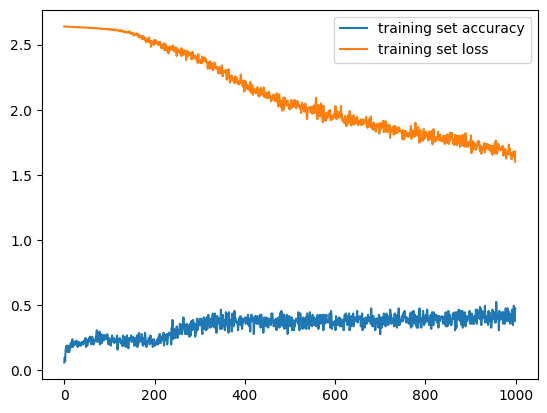

In [25]:
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [26]:
#chatting
import random


while True:
    texts_p = []
    prediction_input = input('Você : ')

    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    #tokenizing and padding
    tokenizer.fit_on_texts(texts_p)
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],x_train.shape[1])

   #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Freudolino : ",random.choice(responses[response_tag]))
    if response_tag == "tchau":
        break

Você : Olá


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Freudolino :  oie querido(a), em que posso ajudar?
Você : estou muito sozinho
Freudolino :  está tudo ótimo.
Você : como voce esta?
Freudolino :  está tudo ótimo.
Você : quem é voce?
Freudolino :  Todos nós podemos sofrer de desafios de saúde mental, mas desenvolver nosso bem-estar, resiliência e buscar ajuda precocemente pode ajudar a evitar que os desafios se tornem sérios.


KeyboardInterrupt: Interrupted by user